In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats 
import math
import seaborn as sns
sns.set_style()

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.rc('text.latex', preamble=r'\usepackage{color}')
smallfs = 8
bigfs = 10

plt.rcParams.update({'font.size': bigfs, 'axes.titlesize':bigfs})
plt.rc('axes', labelsize=bigfs)    # fontsize of the x and y labels
plt.rc('legend',fontsize=smallfs)
plt.rc('xtick', labelsize=smallfs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallfs)    # fontsize of the tick labels



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


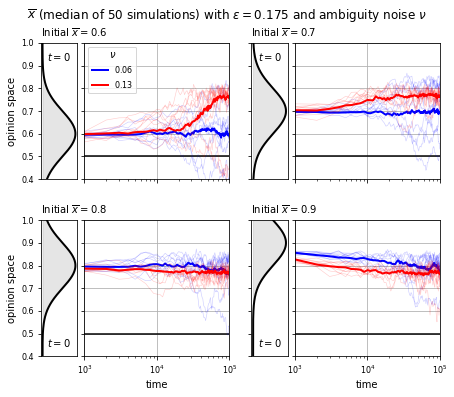

In [2]:
folder = "../../data/ms2_noise-in-OD/singleRuns/"

fig, axs = plt.subplot_mosaic([["a0", "a", ".1", "b0", "b"], ["c0", "c", ".3", "d0", "d"]],
                              gridspec_kw=dict(width_ratios=[0.25, 1, 0.05, 0.25, 1]), 
                              figsize=(16/2.54,14/2.54))

bc = 0.175
#nu = 0.13
sig = 0.1

for ax in [axs[".1"],  axs[".3"]]:
    ax.set_visible(False)

for axn, ic, mean in zip(["a", "b", "c", "d"], ["example1G-0.6", "example1G-0.7", "example1G-0.8", "example1G-0.9"], [0.6, 0.7,0.8, 0.9]):
    ax = axs[axn]
    noise_type = "ambiguity"
    for n, nu in enumerate([0.06,0.13]):#noise_type in enumerate(["ambiguity"]):#, "adaptation", "selection", "exogenous"]):
        col = ["b", "r"][n]#plt.rcParams['axes.prop_cycle'].by_key()['color'][n]
        a = xr.open_dataset(folder+f"model-{noise_type}Noise_singleRes_{ic}Initial_eps{bc:.3f}_seeds0-49.ncdf", engine="netcdf4")
        ax.plot(a.t, a.sel({"bc":bc, "nu":nu, "mu":0.5}).x.mean(dim="id").median(dim="seed"), label=fr"${nu}$", lw=2, color=col)
        for s in a.seed[:10]:
            ax.plot(a.t, a.sel({"bc":bc, "nu":nu, "mu":0.5,"seed":s}).x.mean(dim="id"), lw=0.6, alpha=0.2, color=col)
    ax.set_xlim(0,1e5)
    ax.set_ylim(0.4,1)
    ax.set_title("")
    ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_yticklabels([])
    ax.grid()
    ax2 = axs[axn+"0"]
    op = np.linspace(0,1, 1001)
    ax2.fill_betweenx(op, stats.norm(mean, sig).pdf(op), [0 for _ in op], color="k", alpha=0.1)
    ax2.plot(stats.norm(mean, sig).pdf(op), op, lw=2, color="k")
    #a.sel({"t":0}).x.plot.hist(orientation="horizontal", bins=np.linspace(0,1,101), ax=ax2, density=True, color="grey")
    ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax2.set_xticks([])
    ax2.set_yticklabels([])
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_ylim(0.4, 1)
    ax2.set_title(r"Initial $\overline{x}=$"+rf"${mean}$", x=0, ha="left")
    #ax2.set_title("")
    ax.set_xticks([0,0.5e5, 1e5])
    #ax.set_xticklabels(["0","0.5e5", "1e5"])
    ax.set_xscale("log")
    ax.set_xlim(1000,100000)
    ax.hlines(0.5, 1000, 1e6, color="k", lw=1.5)

axs["a"].legend(fontsize=smallfs, title=r"$\nu$", loc="upper left")
for ax in [axs["a0"], axs["c0"]]:
    ax.set_yticklabels(["0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"])
    ax.set_ylabel("opinion space")
for l, y in zip(["a", "b", "c", "d"], [0.9, 0.9, 0.1, 0.1]):
    axs[l+"0"].text(0.5, y, r"$t=0$", ha="center", va="center", transform=axs[l+"0"].transAxes, rotation=0, fontdict={"weight":"bold"})
    #axs[l+"0"].set_title(r"$t=0$", fontsize=smallfs)

for l in ["a", "b"]:
    axs[l].set_xticklabels([])


for l in ["c", "d"]:
    axs[l].set_xlabel("time")
fig.suptitle(r"$\overline{x}$ "+rf"(median of 50 simulations) with $\epsilon=${bc} and ambiguity noise $\nu$")
fig.subplots_adjust(right=0.97, left=0.09, bottom=0.1, top=0.89, wspace=0.1, hspace=0.3)
plt.savefig(f"figs/meanOp_ambiguity_example1G_bc{bc:.3f}-nu{nu:.3f}_differentMeans.png")